In [59]:
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('Carseats_Clean.csv')

In [60]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,1,1,1,0,0
1,11.22,111,48,16,260,83,65,10,1,1,0,1,0
2,10.06,113,35,10,269,80,59,12,1,1,0,0,1
3,7.40,117,100,4,466,97,55,14,1,1,0,0,1
4,4.15,141,64,3,340,128,38,13,1,0,1,0,0


In [61]:
df_cls = df
df_cls['Sales_class'] = ''

przedzialy = {}

df_cls['Sales_class'] = np.where(df_cls['Sales'] < df_cls['Sales'].quantile(0.333), 0, np.where(df_cls['Sales'] < df_cls['Sales'].quantile(0.666), 1, 2))

df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Sales_class
0,9.50,138,73,11,276,120,42,17,1,1,1,0,0,2
1,11.22,111,48,16,260,83,65,10,1,1,0,1,0,2
2,10.06,113,35,10,269,80,59,12,1,1,0,0,1,2
3,7.40,117,100,4,466,97,55,14,1,1,0,0,1,1
4,4.15,141,64,3,340,128,38,13,1,0,1,0,0,0


Podział na dane testowe i treningowe

In [62]:
X = df.drop(['Sales','Sales_class'], axis=1).values.astype('float')
y = df['Sales_class'].values.astype('float') 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Normalizacja

In [106]:
scaler = MinMaxScaler()
scaler.fit(X_train)
norm_x_train = scaler.transform(X_train)
norm_x_test = scaler.transform(X_test)

Drzewo

In [107]:
mytree1 = tree.DecisionTreeClassifier()

In [108]:
mytree1.fit(norm_x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [109]:
mytree1.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

Struktura drzewa

In [110]:
print("Number of nodes: ", mytree1.tree_.node_count)
print("Left child indices:", mytree1.tree_.children_left)
print("Right child indices:",mytree1.tree_.children_right)
print("Split features:", mytree1.tree_.feature)
print("Threshold values:", mytree1.tree_.threshold)

Number of nodes:  123
Left child indices: [  1   2   3   4   5  -1  -1  -1   9  -1  11  12  13  14  -1  -1  -1  -1
  19  20  21  -1  -1  24  25  -1  -1  -1  -1  30  31  32  33  -1  35  -1
  -1  38  -1  -1  41  42  43  44  -1  -1  -1  -1  -1  50  51  52  53  -1
  -1  56  57  -1  59  60  -1  -1  63  -1  -1  -1  67  68  69  70  71  72
  -1  -1  75  -1  -1  -1  79  -1  -1  82  -1  -1  85  -1  -1  88  89  -1
  -1  92  93  -1  -1  -1  97  98  99  -1  -1 102  -1  -1 105 106 107 108
 109  -1  -1  -1 113 114  -1 116  -1  -1  -1 120  -1  -1  -1]
Right child indices: [ 96  29   8   7   6  -1  -1  -1  10  -1  18  17  16  15  -1  -1  -1  -1
  28  23  22  -1  -1  27  26  -1  -1  -1  -1  49  40  37  34  -1  36  -1
  -1  39  -1  -1  48  47  46  45  -1  -1  -1  -1  -1  87  66  55  54  -1
  -1  65  58  -1  62  61  -1  -1  64  -1  -1  -1  84  81  78  77  74  73
  -1  -1  76  -1  -1  -1  80  -1  -1  83  -1  -1  86  -1  -1  91  90  -1
  -1  95  94  -1  -1  -1 104 101 100  -1  -1 103  -1  -1 122 119 112 111

lista indeksów wszystkich liści drzewa

In [111]:
for i, (l, r) in enumerate(zip(mytree1.tree_.children_left, mytree1.tree_.children_right)):
    if l == -1 and r == -1:
        print(i)

5
6
7
9
14
15
16
17
21
22
25
26
27
28
33
35
36
38
39
44
45
46
47
48
53
54
57
60
61
63
64
65
72
73
75
76
77
79
80
82
83
85
86
89
90
93
94
95
99
100
102
103
109
110
111
114
116
117
118
120
121
122


Mean accuracy

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

data_train, data_test, target_train, target_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=777)
mytree1.fit(data_train, target_train)

print("Mean accuracy: ", mytree1.score(data_test, target_test))
confusion_matrix(target_test, mytree1.predict(data_test))

Mean accuracy:  0.54375


array([[28, 24,  1],
       [16, 29,  8],
       [ 6, 18, 30]], dtype=int64)

cross validation

In [70]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(mytree1, X, y, cv=5)

In [71]:
print("Mean accuracy in each iteration: ", results)
print("Mean accuracy (with 95%% conf. intervals): %0.2f (+/- %0.2f)" % (results.mean(), results.std() * 2))

Mean accuracy in each iteration:  [0.54320988 0.62962963 0.61728395 0.59493671 0.64102564]
Mean accuracy (with 95% conf. intervals): 0.61 (+/- 0.07)


cross val predykcje

In [72]:
from sklearn.model_selection import cross_val_predict
cross_val_predict(mytree1, X, y, cv=5)

array([0., 1., 2., 1., 1., 1., 1., 1., 1., 0., 2., 2., 0., 2., 2., 0., 2.,
       2., 1., 2., 1., 1., 0., 1., 1., 2., 2., 1., 0., 0., 1., 1., 1., 2.,
       0., 2., 2., 0., 0., 0., 0., 1., 2., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 2., 0., 0., 1., 0., 0., 0., 0., 2., 1., 2., 1.,
       2., 1., 2., 1., 1., 2., 2., 1., 2., 0., 0., 2., 2., 1., 2., 0., 0.,
       1., 2., 1., 0., 1., 0., 1., 1., 1., 1., 0., 2., 1., 2., 0., 1., 2.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 2., 2., 1., 1., 1.,
       1., 0., 1., 1., 1., 2., 2., 2., 1., 0., 1., 2., 1., 1., 2., 0., 1.,
       0., 1., 1., 2., 1., 0., 2., 0., 1., 1., 0., 2., 1., 2., 2., 2., 1.,
       2., 1., 2., 2., 2., 2., 1., 0., 0., 0., 2., 0., 1., 0., 2., 2., 2.,
       1., 2., 2., 0., 0., 0., 0., 2., 2., 0., 0., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 2., 0., 2., 2., 2., 0., 0., 0., 2., 1., 1., 0., 0., 1.,
       2., 0., 0., 0., 1., 0., 0., 1., 2., 1., 1., 0., 2., 0., 2., 2., 2.,
       0., 1., 0., 0., 0.

liczba i indeksy przykładów błędnie sklasyfikowanych podczas 10-krotnej walidacji krzyżowej

In [73]:
pred = cross_val_predict(mytree1, X, y, cv=10)
wrong = []
for i, (p, t) in enumerate(zip(pred, y)):
    if p != t:
        wrong.append(i)
print(wrong)
print("Error count: {}".format(len(wrong)))

[0, 4, 6, 9, 15, 16, 19, 20, 24, 25, 26, 27, 31, 32, 38, 42, 45, 48, 49, 54, 55, 59, 60, 61, 62, 63, 64, 65, 66, 67, 71, 72, 75, 77, 79, 80, 83, 85, 86, 88, 91, 92, 94, 100, 101, 103, 105, 108, 111, 112, 115, 116, 117, 118, 119, 124, 126, 129, 131, 132, 133, 135, 136, 138, 140, 141, 144, 148, 149, 153, 154, 155, 156, 161, 163, 164, 165, 166, 167, 170, 174, 179, 188, 189, 191, 192, 198, 200, 201, 206, 207, 208, 213, 214, 217, 218, 220, 226, 227, 231, 237, 241, 243, 244, 247, 248, 250, 252, 253, 256, 258, 263, 269, 271, 277, 278, 279, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 295, 296, 298, 301, 303, 307, 308, 309, 311, 312, 314, 315, 317, 319, 320, 321, 326, 327, 331, 332, 335, 337, 338, 340, 343, 345, 346, 347, 353, 355, 356, 361, 364, 365, 367, 369, 373, 380, 381, 382, 383, 385, 387, 388, 394, 397, 398]
Error count: 174


In [74]:
ytree1 = tree.DecisionTreeClassifier(min_samples_leaf=2)
mytree1.fit(data_train, target_train)
print("Test mean accuracy: %0.2f" % mytree1.score(data_test, target_test))

mytree2 = tree.DecisionTreeClassifier(max_leaf_nodes=50)
mytree2.fit(data_train, target_train)
print("Test mean accuracy: %0.2f" % mytree2.score(data_test, target_test))

Test mean accuracy: 0.53
Test mean accuracy: 0.56


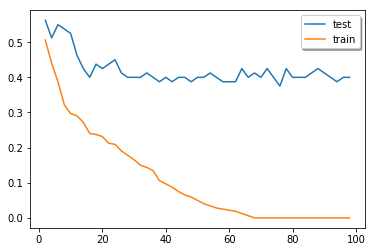

In [75]:
data_train, data_test, target_train, target_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

rng = range(2,100,2)
error_train = []
error_test = []
for i in rng:
    mytree = tree.DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=i)
    mytree.fit(data_train, target_train)
    error_train.append(1 - mytree.score(data_train, target_train))
    error_test.append(1 - mytree.score(data_test, target_test))

plt.plot(rng, error_test, label="test")
plt.plot(rng, error_train, label="train")
plt.legend(shadow=True)
plt.show()

Random forest klasyfikator

In [80]:
X = df.drop(['Sales','Sales_class'], axis=1).values.astype('float')
y = df['Sales_class'].values.astype('float') 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train) 
cross_val_score(rf_classifier, X_train, y_train, cv=5).mean() # ze srednia

C:\Users\Agusia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6533788625167936

In [81]:
rf_classifier.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=789037383, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1220045345, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_wei

score

In [82]:
#score wyrzuca informacje na ile sie udalo dobrze przypisac
rf_classifier.score(X_test, y_test)

0.5583333333333333

Ile drzew od 1 do 100 będzie najlepiej

In [87]:
results = []
estimators = range(1,101)

for e in estimators:
    temp_rf_classifier = RandomForestClassifier(n_estimators = e)
    score = cross_val_score(temp_rf_classifier, X_train, y_train, cv=10).mean()
    results.append(score)
    

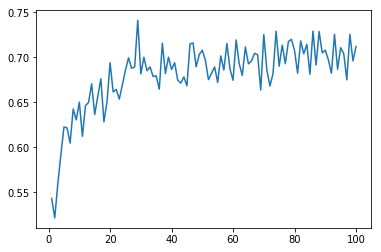

In [88]:
plt.plot(estimators, results)